In [33]:
#import necessary packages
from pyspark.sql import SparkSession

#create spark context
from pyspark.sql import functions as func
from pyspark.sql.types import IntegerType, DoubleType
import pandas as pd
sqlCtx = SparkSession.builder.getOrCreate()

In [10]:
bank_data = sqlCtx.read.option('header','true').options(delimiter=";").csv('bank.csv', inferSchema =True)
bank_data.show()

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

**inferSchema** – infers the input schema automatically from data. It requires one extra pass over the data. If None is set, it uses the default value, false.

In [11]:
bank_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [6]:
bank_data.head(5)

[Row(age='30', job='unemployed', marital='married', education='primary', default='no', balance='1787', housing='no', loan='no', contact='cellular', day='19', month='oct', duration='79', campaign='1', pdays='-1', previous='0', poutcome='unknown', y='no'),
 Row(age='33', job='services', marital='married', education='secondary', default='no', balance='4789', housing='yes', loan='yes', contact='cellular', day='11', month='may', duration='220', campaign='1', pdays='339', previous='4', poutcome='failure', y='no'),
 Row(age='35', job='management', marital='single', education='tertiary', default='no', balance='1350', housing='yes', loan='no', contact='cellular', day='16', month='apr', duration='185', campaign='1', pdays='330', previous='1', poutcome='failure', y='no'),
 Row(age='30', job='management', marital='married', education='tertiary', default='no', balance='1476', housing='yes', loan='yes', contact='unknown', day='3', month='jun', duration='199', campaign='4', pdays='-1', previous='0', 

## TASK 1

### Calculate the mean, median and standard deviation of all the variables/attributes of *numeric* type;

In [14]:
bank_data.select('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', ).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|           balance|               day|          duration|          campaign|             pdays|          previous|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              4521|              4521|              4521|              4521|              4521|              4521|              4521|
|   mean| 41.17009511170095|1422.6578190665782|15.915284229152842|263.96129174961294| 2.793629727936297|39.766644547666445|0.5425790754257908|
| stddev|10.576210958711263|3009.6381424673395| 8.247667327229934|259.85663262468216|3.1098066601885823|100.12112444301656|1.6935623506071211|
|    min|                19|             -3313|                 1|                 4|                 1|                -1|                 0|

## Task 2

### Create a bar graph of the variable/attribute: previous;

<AxesSubplot:xlabel='previous'>

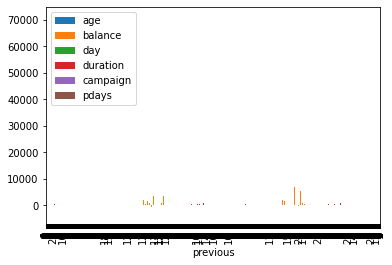

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='job'>

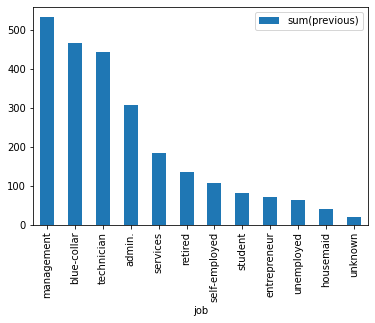

In [41]:
df = bank_data.groupBy('job').agg(func.sum("previous")).orderBy("sum(previous)", ascending=False)
df.toPandas().plot.bar(x='job', y='sum(previous)')

## Task 3

### Create a **normalised** bar graph of the variable/attribute: previous;
Add normalised columns to the input dataframe.

#### Using The min-max feature scaling:
The min-max approach (often called **normalization**) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.
```
(X - min) / (max - min)
```
OR

#### Using The z-score method:
The z-score method (often called **standardization**) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.
```
(X - mean) / std
```

<AxesSubplot:xlabel='job'>

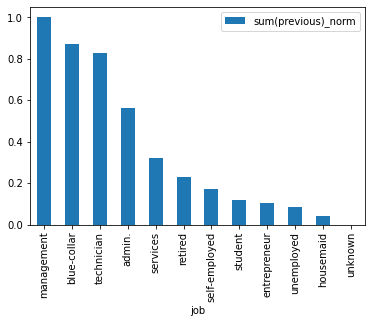

In [35]:
df_normal = df.toPandas()
df_normal["sum(previous)_norm"] = (df_normal["sum(previous)"] - df_normal["sum(previous)"].min()) / (df_normal["sum(previous)"].max() - df_normal["sum(previous)"].min())
df_normal.plot.bar(x='job', y='sum(previous)_norm')

## Task 4
### Create a histogram of the variable/attribute: age;

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

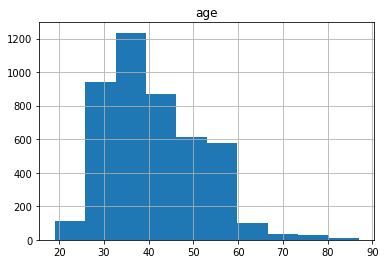

In [49]:
df = bank_data.select("age")
df.toPandas().hist(column="age" )

## Task 5

### Create a histogram of the **normalised** variable/attribute: age;

array([[<AxesSubplot:title={'center':'age_norm'}>]], dtype=object)

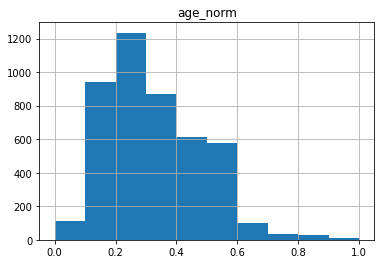

In [48]:
df_normal = df.toPandas()
df_normal["age_norm"] = (df_normal["age"] - df_normal["age"].min()) / (df_normal["age"].max() - df_normal["age"].min())
df_normal.hist(column="age_norm")

## Task 6

### Bin the variable/attribute age and create a bar chart;

<AxesSubplot:xlabel='job'>

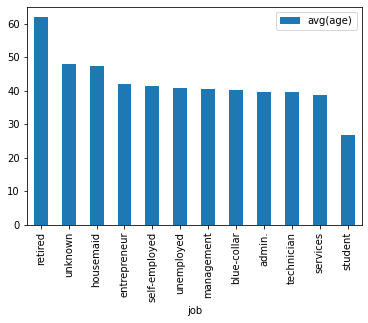

In [52]:
df = bank_data.groupBy('job').agg(func.mean("age")).orderBy("avg(age)", ascending=False)
df.toPandas().plot.bar(x="job", y="avg(age)")

## Task 7

### Create a scatter plot for the following variables/attributes: age and balance;

<AxesSubplot:xlabel='age', ylabel='balance'>

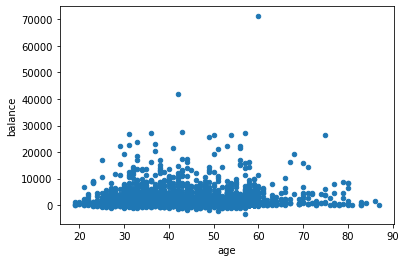

In [53]:
df = bank_data.select("age", "balance")
df.toPandas().plot.scatter(x="age", y="balance")
